# Tarea 3 - Clasificación

Primero se deben cargar las librerias necesarias

In [187]:
#importar numpu, pandas, scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy 
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#estimadores
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

#metricas para modelos
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#validacion cruzada
#esta linea no corre, se investiga y se cambia por la siguiene
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

Importar los datos

In [4]:
#data
datos = pd.read_csv('default of credit card clients.csv', header=1)
datos.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Examinar la estructura de los datos y asegurarse de que todo se haya importado en el formato que necesita para trabajar.

In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [148]:
datos2 = datos
datos2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null category
EDUCATION    30000 non-null category
MARRIAGE     30000 non-null category
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
default      30000 non-null category
dtypes: category(4), int64(21

In [149]:
datos2.drop(columns=['ID'])

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


Como el se trata de una clasificacion vamos a cambiar default payment next month a una variable de tipo categorica, similar a cuando a factor en R. De igual forma lo hacemos para las demas variables como sexo, educacion y estado civil.

In [21]:
datos['default payment next month'] = datos['default payment next month'].astype('category')
datos['SEX'] = datos['SEX'].astype('category')
datos['EDUCATION'] = datos['EDUCATION'].astype('category')
datos['MARRIAGE'] = datos['MARRIAGE'].astype('category')
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null category
EDUCATION                     30000 non-null category
MARRIAGE                      30000 non-null category
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6      

In [96]:
datos = datos.rename(columns={'default payment next month': 'default'})

In [97]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null category
EDUCATION    30000 non-null category
MARRIAGE     30000 non-null category
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
default      30000 non-null category
dtypes: category(4), int64(21

### Seleccion de datos

1. Seleccion de caracteristicas

In [98]:
#features
caract = datos.iloc[:,1:24]
print('Resumen de muestra de características')
caract.head()

Resumen de muestra de características


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


2. Seleccionar la variable dependiente

In [99]:
#variable dependiente
depVar = datos['default']

In [100]:
caract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null category
EDUCATION    30000 non-null category
MARRIAGE     30000 non-null category
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
dtypes: category(3), int64(20)
memory usage: 4.7 MB


3. Establecer los conjuntos de datos (entrenamiento X & Y, pruebas X & Y, 70/30)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(caract, depVar, test_size=0.3, random_state=101)

4. Establecer el conjunto de entrenamiento para la variable Y o variable dependiente (el número de filas coincide  con el conjunto de entrenamiento X)

In [104]:
X_train.head()
x_train_count = X_train.index
print('El número de observaciones en el conjunto de entrenamiento X es:',str(x_train_count))

X_test.head()
X_test_count = X_test.index
print('El número de observaciones en el conjunto de pruebas X es:',str(X_test_count))

y_train.head()
y_train_count = y_train.index
print('El número de observaciones en el conjunto de entrenamiento Y es:',str(y_train_count))

y_test.head()
y_test_count = y_test.index
print('El número de observaciones en el conjunto de pruebas Y es:',str(y_test_count))

El número de observaciones en el conjunto de entrenamiento X es: Int64Index([12160,  1100, 22225,  6385, 22930,  7331, 25448,  5454,  6193,
            25265,
            ...
            17357, 20463, 12363, 22525, 16983,  5695,  8006, 17745, 17931,
            13151],
           dtype='int64', length=21000)
El número de observaciones en el conjunto de pruebas X es: Int64Index([ 6015, 28660, 12498, 22957, 14848, 21298,  3798, 21714,  8362,
            14399,
            ...
            22341,  1382, 28137, 10453,   131, 10574,  7563, 25759, 11978,
            16522],
           dtype='int64', length=9000)
El número de observaciones en el conjunto de entrenamiento Y es: Int64Index([12160,  1100, 22225,  6385, 22930,  7331, 25448,  5454,  6193,
            25265,
            ...
            17357, 20463, 12363, 22525, 16983,  5695,  8006, 17745, 17931,
            13151],
           dtype='int64', length=21000)
El número de observaciones en el conjunto de pruebas Y es: Int64Index([ 6015,

### Construir los modelos y eleccion del modelo correcto

Establecer las variables que se usaran para definir cada modelo. Se van a  establecer tres modelos diferentes con los nombres de las variables individuales.

In [198]:
#Modelos
modelSVC = SVC()
modelRF = RandomForestClassifier()
modelLR = LogisticRegression(max_iter = 4000)

Validar que se está utilizando la columna correcta para la variable dependiente

In [106]:
#dependent variable
print(depVar)

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default, Length: 30000, dtype: category
Categories (2, int64): [0, 1]


Utilizando las variables de modelo que establecidas anteriormente las vamos a pasar como parte de entrenamiento

In [177]:
modelSVC.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Se va realizar lo mismo para los otros 2 modelos (Random Forest y Regresion Linal como clasificador)

In [172]:
modelRF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [199]:
modelLR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=4000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Escoger el mejor modelo

Sci-Kit Learn tiene una función que 'puntuará' la adecuación de cada modelo según el algoritmo que se utilizó para construirlo; los modelos con los puntajes más altos deben usarse para hacer predicciones. La métrica que se utilizará para verificar el uso apropiado del modelo se llama cross_val_score.

In [110]:
print(cross_val_score(modelRF, X_train, y_train)) 

[0.81380952 0.81404762 0.81642857 0.80690476 0.81380952]


In [200]:
print(cross_val_score(modelLR, X_train, y_train)) 

[0.77666667 0.77642857 0.77642857 0.77642857 0.77642857]


In [112]:
print(cross_val_score(modelSVC, X_train, y_train)) 

[0.77666667 0.77642857 0.77642857 0.77642857 0.77642857]


Estos valores corresponden a lo siguiente:
<br>
1er valor: la matriz de puntajes para los puntajes de las pruebas en cada división de cross validation (Si es un indicador de un modelo con mejor rendimiento)
<br>
2do valor: El tiempo para ajustar el estimador en el conjunto de trenes para cada división de cross validation
<br>
3er valor: El tiempo para calificar el estimador en el conjunto de prueba para cada división de croos validation

Ahora vamos a evaluar los modelos utilizando el puntaje

In [113]:
modelRF.score(X_train,y_train)

0.9996190476190476

In [126]:
modelLR.score(X_train,y_train)

0.7763809523809524

In [115]:
modelSVC.score(X_train,y_train)

0.7767142857142857

### Realizar las predicciones

Una vez elegido el modelo, se utilizará para hacer predicciones.

Predicciones para Random Forest - Datos originales

In [173]:
predictionsRF = modelRF.predict(X_test)

cmOrig = confusion_matrix(y_test, predictionsRF)
print(cmOrig)
print('Precision', accuracy_score(y_test, predictionsRF))

[[6651  407]
 [1235  707]]
Precision 0.8175555555555556


Predicciones para Logistic Regression - Datos originales

In [175]:
predictionsLR = modelLR.predict(X_test)

cmOrigLR = confusion_matrix(y_test, predictionsLR)
print(cmOrigLR)
print('Precision', accuracy_score(y_test, predictionsLR))

[[7056    2]
 [1940    2]]
Precision 0.7842222222222223


Predicciones para SVM - Datos originales

In [178]:
predictionsSVC = modelSVC.predict(X_test)

cmOrigSVC = confusion_matrix(y_test, predictionsSVC)
print(cmOrigSVC)
print('Precision', accuracy_score(y_test, predictionsSVC))

[[7058    0]
 [1942    0]]
Precision 0.7842222222222223


### PCA

PCA es una técnica utilizada para describir un conjunto de datos en términos de nuevas variables ("componentes") no correlacionadas. Los componentes se ordenan por la cantidad de varianza original que describen, por lo que la técnica es útil para reducir la dimensionalidad de un conjunto de datos.

In [160]:
#normalizamos los datos
scaler=StandardScaler()
dfPCA = datos2
dfPCA = dfPCA.drop(['default'], axis=1) # quito la variable dependiente "Y"
X_train_pca = scaler.fit_transform(X_train)
X_test_pca = scaler.transform(X_test) # se escalan los datos y se normalizan

In [161]:
#Instanciamos objeto PCA y aplicamos
pca=PCA(.85) #para lograr el 85%
X_train_pca = pca.fit_transform(X_train_pca)
X_test_pca = pca.transform(X_test_pca)

In [163]:
print("X_train_pca Shape", X_train_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:12]))
#Vemos que con 12 componentes tenemos algo mas del 85% de varianza explicada

X_train_pca Shape (21000, 11)
[0.28526298 0.17947236 0.06931597 0.06478187 0.04467166 0.04170018
 0.03945484 0.03815964 0.03758721 0.03287877 0.03042007]
suma: 0.8637055537744031


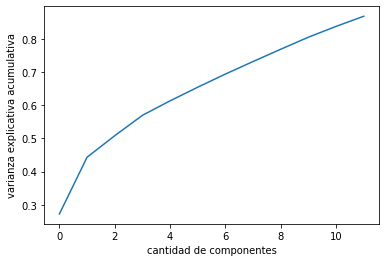

In [157]:
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('cantidad de componentes')
plt.ylabel('varianza explicativa acumulativa')
plt.show()

Como se ve del analisis anterior y sus respectiva gráfica es posible determinar que con 12 atributos es posible explicar el 85%

Entrenamiento y predicciones PCA - Random Forest

In [179]:
rfClassifierPCA = RandomForestClassifier()
rfClassifierPCA.fit(X_train_pca, y_train)

# Predicting the Test set results
y_pred_pca = rfClassifierPCA.predict(X_test_pca)

Evaluación del desempeño - Random Forest

In [180]:
cmPCA = confusion_matrix(y_test, y_pred_pca)
print(cmPCA)
print('Precision', accuracy_score(y_test, y_pred_pca))

[[6672  386]
 [1403  539]]
Precision 0.8012222222222222


Entrenamiento y predicciones PCA - SVM

In [181]:
svcClassifierPCA = SVC()
svcClassifierPCA.fit(X_train_pca, y_train)

# Predicting the Test set results
y_pred_pca_SVC = svcClassifierPCA.predict(X_test_pca)

Evaluación del desempeño - SVM

In [184]:
cmPCA_SVM = confusion_matrix(y_test, y_pred_pca_SVC)
print(cmPCA_SVM)
print('Precision', accuracy_score(y_test, y_pred_pca_SVC))

[[6848  210]
 [1505  437]]
Precision 0.8094444444444444


Entrenamiento y predicciones PCA - Logistic Regression

In [185]:
lrClassifierPCA = LogisticRegression()
lrClassifierPCA.fit(X_train_pca, y_train)

# Predicting the Test set results
y_pred_pca_LR = lrClassifierPCA.predict(X_test_pca)

Evaluación del desempeño - Logistic Regression

In [186]:
cmPCA_LR = confusion_matrix(y_test, y_pred_pca_LR)
print(cmPCA_LR)
print('Precision', accuracy_score(y_test, y_pred_pca_LR))

[[6932  126]
 [1640  302]]
Precision 0.8037777777777778


### RFE

RFE es un algoritmo de optimización que busca encontrar el subconjunto de funciones con mejor rendimiento. Crea repetidamente modelos y deja de lado la mejor o la peor característica de rendimiento en cada iteración. Construye el siguiente modelo con las características de la izquierda hasta que se agotan todas las características, luego clasifica las características según el orden de su eliminación.

Creación del modelo - RF

In [189]:
rfeRF = RFE(modelRF, 6)
rfeRF = rfeRF.fit(X_train, y_train)

print("# Caracteristicas: %d" % rfeRF.n_features_)
print("Caracteristicas seleccionadas: %s" % rfeRF.support_)
print("Ranking de caracteristicas: %s" % rfeRF.ranking_)

# Caracteristicas: 6
Caracteristicas seleccionadas: [False False False False False  True False False False False False  True
  True  True False  True  True False False False False False False]
Ranking de caracteristicas: [ 5 18 15 17  3  1  8 12 13 16 14  1  1  1  2  1  1  4  6  7 10 11  9]


Predicción RFE - RF

In [190]:
# predicción
y_pred_rfe_RF = rfeRF.predict(X_test)

Evaluación de desempeño RFE - RF

In [191]:
cmRFE_RF = confusion_matrix(y_test, y_pred_rfe_RF)
print(cmRFE_RF)
print('Precision', accuracy_score(y_test, y_pred_rfe_RF))

[[6651  407]
 [1280  662]]
Precision 0.8125555555555556


Modelo RFE - Logistic Regression

In [193]:
modelLR = LogisticRegression(max_iter = 4000)
rfeLR = RFE(modelLR, 6)
rfeLR = rfeLR.fit(X_train, y_train)

print("# Caracteristicas: %d" % rfeLR.n_features_)
print("Caracteristicas seleccionadas: %s" % rfeLR.support_)
print("Ranking de caracteristicas: %s" % rfeLR.ranking_)

# Caracteristicas: 6
Caracteristicas seleccionadas: [False  True  True  True False  True  True  True False False False False
 False False False False False False False False False False False]
Ranking de caracteristicas: [14  1  1  1  5  1  1  1  3  4  2 10 11 15 18 13 17  7  6  9 12  8 16]


Predicción RFE - Logistic Regression

In [194]:
# predicción
y_pred_rfe_LR = rfeLR.predict(X_test)

Evaluación de desempeño RFE - Logistic Regression

In [195]:
cmRFE_LR = confusion_matrix(y_test, y_pred_rfe_LR)
print(cmRFE_LR)
print('Precision', accuracy_score(y_test, y_pred_rfe_LR))

[[6901  157]
 [1508  434]]
Precision 0.815


### Conclusiones

Se investigaron los datos, visualizando las características y entendiendo la relación entre las diferentes características.

Luego investigamos 8 modelos predictivos:
<br>
- 3 modelos con los datos originales: Random Forest, SVM y Logistic Regression
<br>
- Los mismos 3 modelos anteriores utilizando PCA
<br>
- 2 modelos con RFE: Random Forest y Logistic Regression, se tuvo inconvenientes en la utilizacion de SVM utilizando RFE el cual dio un error y no se pudo profundizar en el mismo
<br>
<br>
El mejor modelo fue el Random Forest con el conjunto de datos originales, con una precision del 81,75% contra los datos de pruebas. <br><br>
Lo anterior nos demuestra que es posible generar un modelo con una precision aceptable (8 de cada 10) para la prediccion del incumplimiento de pago del credito de los clientes de Credit One.<br><br>
Ademas, el utilizar el conjunto de datos original no representa una gran diferencia con respecto a la ingeneria de datos con PCA o RFE, la diferencia en la precision no fue mayor al 1%<br><br>
Es de suma importancia para CreditOne contar con un modelo que permita predecir el comportamiento de pago de sus usuarios, lo cual, si bien no indica que no tendran incumpliento de pago de sus clientes pues aun existen razones extras a este analisis por las cuales se pueda generar un incumplimiento, prevee basado en el comportamiento de un cliente cuando se puede generar un incumplimiento y tomar acciones al respecto.<br><br>
Por ultimo, se puede desarrollar un modelo solo basado en los datos demograficos y validar su precision para desarrollar basado en estos un perfil de comportamiento previo al otorgarse un credito, mitigando aun mas el riesgo de nuestros clientes bancarios.